<a href="https://colab.research.google.com/github/hyperkraz/MAT421/blob/main/L13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**13.2.2**

In [50]:
import numpy as np

def legendre(N,x):
  a,b = 1+0*x,x
  for n in range(N):
    coef_N0 = (2*N+1)/(N+1) * x
    coef_N1 = N/(N+1)
    a,b = b,coef_N0*b - coef_N1*a
  return a

def newton1d(f,df,x0,tol=1e-14,maxiter=1000):
  x = x0
  r,i = -f(x),0
  while np.abs(r)>tol and i<maxiter:
    x += r/df(x)
    r = -f(x)
    i += 1
  return x,i


f  = lambda x: legendre(4,x)
fp = lambda x: (4*35*x**3 - 60*x)/8
x0,tol,maxiter = 0.5,1e-15,10
root = newton1d(f,fp,x0,tol,maxiter)
print('exact newton root = {:.16f} in {:d} iterations'.format(*root))

exact newton root = 0.3704486247742299 in 10 iterations


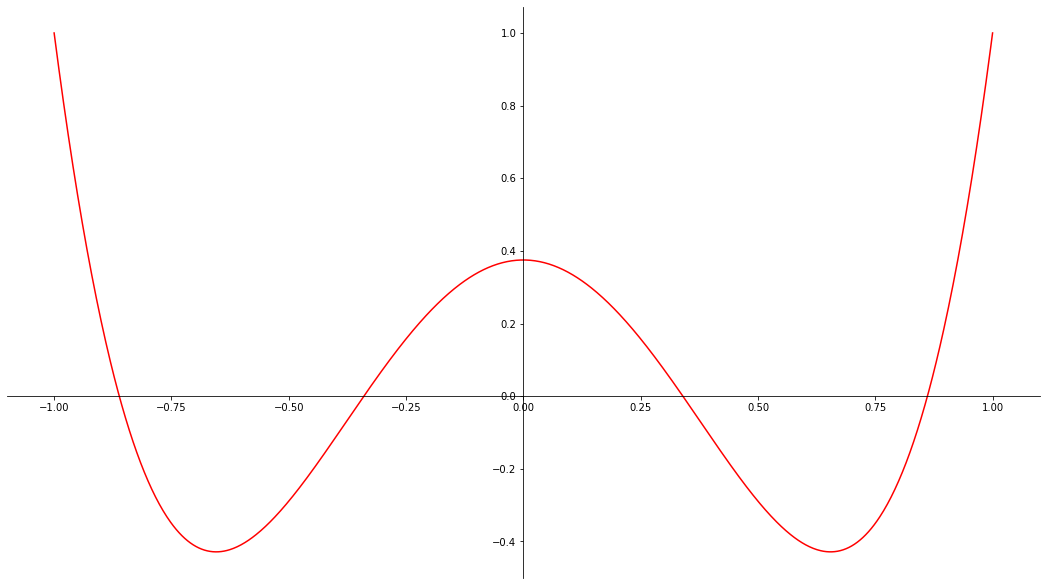

In [51]:
import matplotlib.pyplot as plt
import numpy as np

# 100 linearly spaced numbers
x = np.linspace(-1,1,1000)

y = (1/8) * (35*x**4 - 30*x**2 + 3)

# setting the axes at the centre
fig = plt.figure()
fig.set_size_inches(18.5, 10.5)
ax = fig.add_subplot(1, 1, 1)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# plot the function
plt.plot(x,y, 'r')



# show the plot
plt.show()

**13.3.2**

In [52]:
from scipy.optimize import fsolve
from numpy import *
f = lambda x: [x[0]+x[1]-1.,
               (x[0]**2)+(x[1]**2)-2.]
fsolve(f, [1.,0.])

array([ 1.3660254, -0.3660254])

**14.1.1**

In [53]:
import numpy as np

def func(A):
  B = A.T @ A
  S = A * A
  SS = S.sum()
  M = A.mean(axis=0)
  print("a) ", B)
  print("\n")
  print("b) ", SS)
  print("\n")
  print("c) ", M)
  #return B, SS, M

A = np.array([[1, 2],[3, 4], [5, 6]])

func(A)

a)  [[35 44]
 [44 56]]


b)  91


c)  [3. 4.]


**14.2.1**

In [54]:

import numpy as np
import scipy as sp
def mylu(A,pivoting=False):
  """
  ======================================================================
  LU factorization with optional partial pivoting for square matrices
  ----------------------------------------------------------------------
  
  inputs
  ------
  A        : np.matrix being factorized, shape (N,N)
  pivoting : bool, default False, set to True for partial pivoting
  outputs
  -------
  LU : np.matrix, U on upper triangular part, rest strict low. tri. is L
  p  : np.array, pivoting index array
  d  : scalar, determinant of input matrix
  ----------------------------------------------------------------------
  """
  # =====================
  # Simple error checking
  if not isinstance(A,np.matrix):
    estr = f"Input `A` must be type np.matrix -- input type: {type(A)}"
    raise TypeError(estr)
  M,N = A.shape
  if M != N:
    estr = f"Input `A` must be square -- input shape: {M} by {N}"
    raise np.linalg.LinAlgError(estr)
  # ===
  # What are other appropriate error checks for this method?
  # ---
  LU = A.copy() # does this result in A being overwritten?
  p  = np.arange(N)
  d  = 1.0
  for k in range(N-1):
    if pivoting:
      c = np.abs(LU[k:,k])  # diag/subdiag coefs in column k
      i = c.argmax()+k      # index of max multiplier
      LU[[k,i]] = LU[[i,k]] # permute rows k and i
      p[k],p[i] = p[i],p[k] # exchange values
      d = -d                # permutation changes det. sign
    if LU[k,k] != 0:
      LU[k+1:,k] /= LU[k,k] 
      # What can go wrong here if LU is not type np.matrix?
      LU[k+1:,k+1:] -= LU[k+1:,k]*LU[k,k+1:] 
    else: 
      print('zero pivot at stage ',k+1)
    d *= LU[k,k]
  d *= LU[-1,-1]
  return LU,p,d
def backsolve(LU,p,b):
  """
  =====================================================================
  Solves system LU x = Pb
  ---------------------------------------------------------------------
  
  inputs
  ------
  LU : np.matrix with U on np.triu, strict low. tri. part of L rest
  p  : np.array pivoting index array
  b  : np.matrix (as column), right hand side vector
  outputs
  -------
  x : same type as b, solution vector
  TODO
  ----
  Error handling.
  ---------------------------------------------------------------------
  """
  N = len(LU)
  if N==len(b):
    x = b[p]
    for k in range(1,N):
      # what happens in the following line if LU and x are type array
      # instead of matrix?
      x[k] -= LU[k,:k]*x[:k]
    for k in range(N-1,-1,-1):
      # what happens in the following line if LU and x are type array
      # instead of matrix?
      x[k] -= LU[k,k+1:]*x[k+1:]
      x[k] /= LU[k,k]
  return x
if __name__ == "__main__":
  """Basic Operational Testing (no comp-sci error checking)"""
  A = np.mat("[2 -1 0; -1 2 -1; 0 -1 2]",dtype=float)
  b = np.mat("[1 2 3]",dtype=float).T
  print(f' "A" =\n {A.__str__()}')
  print(f' "b" =\n {b.__str__()}')
  print(72*'-')
  LU,p,d = mylu(A,pivoting=True)
  print(f' "LU" =\n {LU.__str__()}')
  print('d =',d)
  print('p =',p)
  I = np.eye(len(A))
  L = np.tril(LU,-1)+I
  U = np.triu(LU)
  P = np.mat(I[p])
  print(f'L = \n {L.__str__()}')
  print(f'U = \n {U.__str__()}')
  print(f'P = \n {P.__str__()}')
  err = np.linalg.norm(P@A-L@U,'fro')
  print(f'factorization error ||PA-LU||_F: {err}')
  print(72*'-')
  x = backsolve(LU,p,b)
  print(f'solution vector x = \n {x.__str__()}')

 "A" =
 [[ 2. -1.  0.]
 [-1.  2. -1.]
 [ 0. -1.  2.]]
 "b" =
 [[1.]
 [2.]
 [3.]]
------------------------------------------------------------------------
 "LU" =
 [[ 2.         -1.          0.        ]
 [-0.5         1.5        -1.        ]
 [ 0.         -0.66666667  1.33333333]]
d = 4.0
p = [0 1 2]
L = 
 [[ 1.          0.          0.        ]
 [-0.5         1.          0.        ]
 [ 0.         -0.66666667  1.        ]]
U = 
 [[ 2.         -1.          0.        ]
 [ 0.          1.5        -1.        ]
 [ 0.          0.          1.33333333]]
P = 
 [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
factorization error ||PA-LU||_F: 0.0
------------------------------------------------------------------------
solution vector x = 
 [[2.5]
 [4. ]
 [3.5]]


In [55]:

import numpy as np
import scipy as sp
def mylu(A,pivoting=False):
  """
  ======================================================================
  LU factorization with optional partial pivoting for square matrices
  ----------------------------------------------------------------------
  
  inputs
  ------
  A        : np.matrix being factorized, shape (N,N)
  pivoting : bool, default False, set to True for partial pivoting
  outputs
  -------
  LU : np.matrix, U on upper triangular part, rest strict low. tri. is L
  p  : np.array, pivoting index array
  d  : scalar, determinant of input matrix
  ----------------------------------------------------------------------
  """
  # =====================
  # Simple error checking
  if not isinstance(A,np.matrix):
    estr = f"Input `A` must be type np.matrix -- input type: {type(A)}"
    raise TypeError(estr)
  M,N = A.shape
  if M != N:
    estr = f"Input `A` must be square -- input shape: {M} by {N}"
    raise np.linalg.LinAlgError(estr)
  # ===
  # What are other appropriate error checks for this method?
  # ---
  LU = A.copy() # does this result in A being overwritten?
  p  = np.arange(N)
  d  = 1.0
  for k in range(N-1):
    if pivoting:
      c = np.abs(LU[k:,k])  # diag/subdiag coefs in column k
      i = c.argmax()+k      # index of max multiplier
      LU[[k,i]] = LU[[i,k]] # permute rows k and i
      p[k],p[i] = p[i],p[k] # exchange values
      d = -d                # permutation changes det. sign
    if LU[k,k] != 0:
      LU[k+1:,k] /= LU[k,k] 
      # What can go wrong here if LU is not type np.matrix?
      LU[k+1:,k+1:] -= LU[k+1:,k]*LU[k,k+1:] 
    else: 
      print('zero pivot at stage ',k+1)
    d *= LU[k,k]
  d *= LU[-1,-1]
  return LU,p,d
def backsolve(LU,p,b):
  """
  =====================================================================
  Solves system LU x = Pb
  ---------------------------------------------------------------------
  
  inputs
  ------
  LU : np.matrix with U on np.triu, strict low. tri. part of L rest
  p  : np.array pivoting index array
  b  : np.matrix (as column), right hand side vector
  outputs
  -------
  x : same type as b, solution vector
  TODO
  ----
  Error handling.
  ---------------------------------------------------------------------
  """
  N = len(LU)
  if N==len(b):
    x = b[p]
    for k in range(1,N):
      # what happens in the following line if LU and x are type array
      # instead of matrix?
      x[k] -= LU[k,:k]*x[:k]
    for k in range(N-1,-1,-1):
      # what happens in the following line if LU and x are type array
      # instead of matrix?
      x[k] -= LU[k,k+1:]*x[k+1:]
      x[k] /= LU[k,k]
  return x
if __name__ == "__main__":
  """Basic Operational Testing (no comp-sci error checking)"""
  A = np.mat("[1 2 3; 4 5 6; 7 8 10]",dtype=float)
  b = np.mat("[1 2 3]",dtype=float).T
  print(f' "A" =\n {A.__str__()}')
  print(f' "b" =\n {b.__str__()}')
  print(72*'-')
  LU,p,d = mylu(A,pivoting=True)
  print(f' "LU" =\n {LU.__str__()}')
  print('d =',d)
  print('p =',p)
  I = np.eye(len(A))
  L = np.tril(LU,-1)+I
  U = np.triu(LU)
  P = np.mat(I[p])
  print(f'L = \n {L.__str__()}')
  print(f'U = \n {U.__str__()}')
  print(f'P = \n {P.__str__()}')
  err = np.linalg.norm(P@A-L@U,'fro')
  print(f'factorization error ||PA-LU||_F: {err}')
  print(72*'-')
  x = backsolve(LU,p,b)
  print(f'solution vector x = \n {x.__str__()}')

 "A" =
 [[ 1.  2.  3.]
 [ 4.  5.  6.]
 [ 7.  8. 10.]]
 "b" =
 [[1.]
 [2.]
 [3.]]
------------------------------------------------------------------------
 "LU" =
 [[ 7.          8.         10.        ]
 [ 0.14285714  0.85714286  1.57142857]
 [ 0.57142857  0.5        -0.5       ]]
d = -2.9999999999999982
p = [2 0 1]
L = 
 [[1.         0.         0.        ]
 [0.14285714 1.         0.        ]
 [0.57142857 0.5        1.        ]]
U = 
 [[ 7.          8.         10.        ]
 [ 0.          0.85714286  1.57142857]
 [ 0.          0.         -0.5       ]]
P = 
 [[0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]]
factorization error ||PA-LU||_F: 0.0
------------------------------------------------------------------------
solution vector x = 
 [[-0.33333333]
 [ 0.66666667]
 [-0.        ]]


**14.3.2**

QR

In [56]:

import numpy as np

def qrsol(A, b):
  Q, R = np.linalg.qr(A)
  c = Q.T @ b
  n = 2
  xcomp = np.zeros(n)

  for i in range(n-1, -1, -1):
      tmp = c[i]
      for j in range(n-1, i, -1):
          tmp -= xcomp[j]*R[i,j]
        
      xcomp[i] = tmp/R[i,i]
  
  ans = xcomp
  return ans

A = np.mat("[1 2; 4 5; 7 8]",dtype=float)
b = np.mat("[3 6 10]",dtype=float).T


print(qrsol(A,b))


[-0.5         1.66666667]


In [57]:
swee = A.T @ A
yoo = A.T @ b

yo = np.linalg.solve(swee, yoo)
print(yo)

[[-0.5       ]
 [ 1.66666667]]


qr test

In [58]:
import numpy as np
A=np.array([[1,2,3],[4,5,6],[7,8,10]])
Q,R=np.linalg.qr(A)
print(Q)
print(R)
print(np.allclose(Q@R,A,atol=1e-10,rtol=1e-5))
b=A@np.array([1,2,3])
x=np.linalg.solve(R,Q.T@b)
print(x)

[[-0.12309149  0.90453403  0.40824829]
 [-0.49236596  0.30151134 -0.81649658]
 [-0.86164044 -0.30151134  0.40824829]]
[[ -8.1240384   -9.6011363  -11.93987462]
 [  0.           0.90453403   1.50755672]
 [  0.           0.           0.40824829]]
True
[1. 2. 3.]


In [59]:
"""

import numpy as np
A=np.array([[1.,2],[4,5],[7,8]])
#foo = A.T @ A
Q,R=np.linalg.qr(A)
print(Q)
print(R)
print(np.allclose(Q@R,A,atol=1e-10,rtol=1e-5))
b=A.T@np.array([3.,6,10])
#swee = A.T @ b
x=np.linalg.solve(R,Q.T@b)
print(x)

"""

'\n\nimport numpy as np\nA=np.array([[1.,2],[4,5],[7,8]])\n#foo = A.T @ A\nQ,R=np.linalg.qr(A)\nprint(Q)\nprint(R)\nprint(np.allclose(Q@R,A,atol=1e-10,rtol=1e-5))\nb=A.T@np.array([3.,6,10])\n#swee = A.T @ b\nx=np.linalg.solve(R,Q.T@b)\nprint(x)\n\n'

SVD

In [60]:


"""

def svdsolve(a,b):
    import numpy as np
    u,s,v = np.linalg.svd(a)
    c = np.dot(u.T,b)
    w = np.linalg.solve(np.diag(s),c)
    x = np.dot(v.T,w)
    return x

A = np.mat("[1 2; 4 5; 7 8]",dtype=float)
b = np.mat("[3 6 10]",dtype=float).T

svdsolve(A,b)

"""

'\n\ndef svdsolve(a,b):\n    import numpy as np\n    u,s,v = np.linalg.svd(a)\n    c = np.dot(u.T,b)\n    w = np.linalg.solve(np.diag(s),c)\n    x = np.dot(v.T,w)\n    return x\n\nA = np.mat("[1 2; 4 5; 7 8]",dtype=float)\nb = np.mat("[3 6 10]",dtype=float).T\n\nsvdsolve(A,b)\n\n'

In [61]:
import numpy as np
A=np.array([[1,2,3],[4,5,6],[7,8,10]])
U,s,VT=np.linalg.svd(A)
print(U)
print(np.diag(s))
print(np.diag(VT))
print(np.allclose(U*s@VT,A,atol=1e-10,rtol=1e-5))
b=A@np.array([1,2,3])
x=VT.T/s@U.T@b
print(x)


[[-0.20933734  0.96438514  0.16167618]
 [-0.50384851  0.03532145 -0.86306956]
 [-0.8380421  -0.26213299  0.47850992]]
[[17.41250517  0.          0.        ]
 [ 0.          0.87516135  0.        ]
 [ 0.          0.          0.19686652]]
[-0.46466755  0.00949949  0.46585022]
True
[1. 2. 3.]


In [62]:
"""

import numpy as np
A=np.array([[1.,2],[4,5],[7,8]])
U,s,VT=np.linalg.svd(A)
print(U)
print(np.diag(s))
print(np.diag(VT))
print(np.allclose(U*s@VT,A,atol=1e-10,rtol=1e-5))
b=A@np.array([3.,6,10])
x=VT.T/s@U.T@b
print(x)

"""

'\n\nimport numpy as np\nA=np.array([[1.,2],[4,5],[7,8]])\nU,s,VT=np.linalg.svd(A)\nprint(U)\nprint(np.diag(s))\nprint(np.diag(VT))\nprint(np.allclose(U*s@VT,A,atol=1e-10,rtol=1e-5))\nb=A@np.array([3.,6,10])\nx=VT.T/s@U.T@b\nprint(x)\n\n'

In [63]:
swee = A.T @ A
yoo = A.T @ b

yo = np.linalg.solve(swee, yoo)
print(yo)

[1. 2. 3.]
